# 如何做金融数据统计？

## 目录

1. 快读检验一列数是否是正态分布。
2. 偏度和峰度.
3. scipy简要介绍
4. scipy.stats.ProbPlot
5. 从ptobplott中得到一些信息
6. 从箱形图中得到一些信息

## 1.快速检验正态分布

正态分布是最常见的分布形式之一，在开始分析数据时快速判断分布的形式有时能节省很多功夫。

JarqueBera检验可以帮助我迅速判断一个分布是否属于正态分布，JarqueBera检验返回一个P-value，P-Value越小代表越不可能是正态分布。这里我取0.05作为阈值.

假设回报率是满足正态分布，然而当p_value<0.05则拒绝原假设，该股票回报率不为正态分布。

用t检验600036股票收益率均值是否为0，假设平均收益率为0，然而当p_value>0.05则无法拒绝原假设，该股票平均收益率为0。

In [19]:
import tushare as ts
from statsmodels.stats.stattools import jarque_bera

data = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['percentage']=data['close'].pct_change()

returns = data['percentage'][1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print ('判断样本分布服从正态分布')
else:
    print ('判断样本分布不服从正态分布')

判断样本分布不服从正态分布


另一个人们关心的属性就是收益率的均值，t_test可以帮助我们快速判断一组数据的均值位置，单样本t_test可以传入2个参数，第一个是待检验的数据，第二个是原假设均值。比如下面我第二个参数传入0，检验的就是样本均值为0的概率。

In [20]:
t_test = stats.ttest_1samp(returns, 0)
if t_test.pvalue > 0.05:
    print ('判断样本均值为0')
else:
    print ('判断样本均值不为0')

判断样本均值为0


## 2.偏度与峰度？

除了人们最关心的均值和方差，这里我再介绍两个统计量，偏度和峰度。

用 $\mu, \sigma$ 表示随机变量X的均值和方差。

### 偏度（Skewness）

$$
Skewness = E \left[ (\frac{X-\mu}{\sigma})^3 \right]
$$

偏度用于描述一个分布是否左右对称，一个左右对称的分布偏度（skewness）的值为 0. 

正倾斜偏度分布意味 mean > median > mode。 

负倾斜偏度分布意味 mean < median < mode。

#### 正峰度和负峰度的直观举例
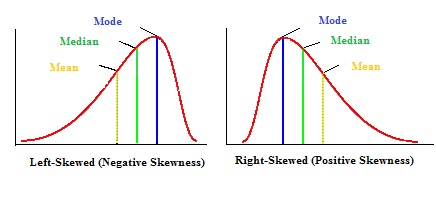


反过来讲，一个偏度为0的分布就是左右对称的吗？在大多数情况下这是正确的，也是符合直觉的。但如果你是一个喜欢刨根问底的有着浓厚数学基因的人，好吧，确实存在偏度为0但是不左右对称的分布，我们下面简单给出的一个例子，你可以尝试验证一下。

$$
 P(X=n)=\left\{\begin{matrix}
 0.03 & n=-3  \\ 
 0.04 & n = -2\\
 0.25  & n = -1\\ 
0.40  & n = 0 \\
0.15  & n = 1 \\ 
0.12  & n = 2 \\
0.01  & n = 3
\end{matrix}\right.
$$

### 峰度（Kurtosis）

$$
Kurtosis = E \left[ (\frac{X-\mu}{\sigma})^4 \right]
$$

峰度用于衡量分布的尖峰或平扁的程度。

当峰度＞3时，可以认为尖峰’很尖了‘。

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


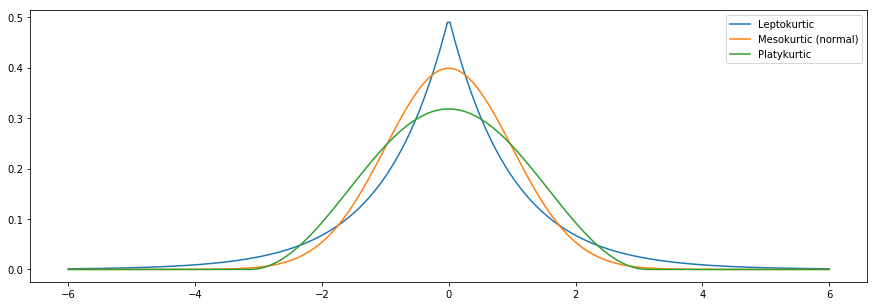

In [10]:
# 峰态（Kurtosis）
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
# Plot some example distributions
fig = plt.figure(figsize=(15, 5))
plt.plot(xs, stats.laplace.pdf(xs), label='Leptokurtic')
print ('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k')))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print ('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k')))
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print ('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k')))
plt.legend()
plt.show()

Skew: -0.0844255630964
kurtosis: 2.86011789931


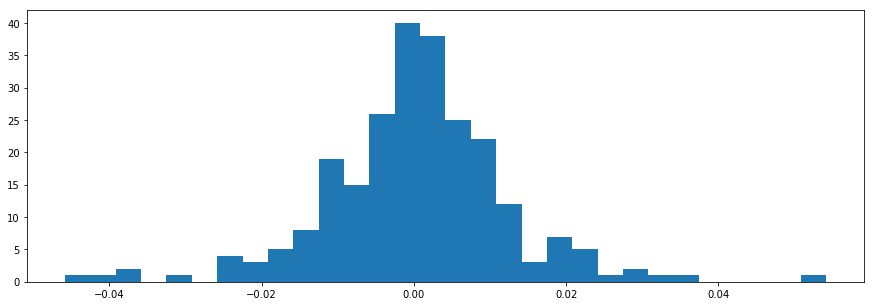

In [11]:
#计算600036的偏峰与峰态
import tushare as ts

data = ts.get_k_data('600036', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['returns'] = data['close'].pct_change()[1:]
returns = data['returns'].dropna()

print ('Skew:', stats.skew(returns))
print ('kurtosis:', stats.kurtosis(returns))
fig = plt.figure(figsize=(15, 5))
plt.hist(returns, 30)
plt.show()

## 3.SciPy

Scipy是世界上著名的Python开源科学计算库，建立在Numpy之上。它增加的功能包括数值积分、最优化、统计和一些专用函数。提供很多常用而且强大的功能，方便好用。

### 用scipy分析样本

In [21]:
import numpy as np
import random
import scipy.stats as stats
random.seed(7)
# 生成符合正态分析的随机数
generated = np.random.normal(loc=0,scale=1,size=1000)

# 可以使用fit()方法对随机取样序列x进行拟合，返回的是与随机取样值最吻合的随机变量的参数
Mean,std = stats.norm.fit(generated)
print('Mean =',Mean,',std =',std)
# 得到数据所在区域中某一百分比处的数值
l = stats.scoreatpercentile(generated,95)
print('95% point: ',l)
# 反过来，得到数值所在的百分比
print(u'%s location:'%l,stats.percentileofscore(generated,l))

Mean = 0.03659131667544834 ,std = 0.9758782948555345
95% point:  1.6318832096884532
1.6318832096884532 location: 95.0


### 用scipy比较两个样本

In [22]:
sample1 = np.random.normal(loc=0,scale=1,size=1000)
sample2 = np.random.normal(loc=2,scale=2,size=1000)

使用ttest_ind可以检验两组不同的样本是否有相同的均值.返回的p-value表示两组样本均值相同的概率。

In [23]:
a = stats.ttest_ind(sample1,sample2)
print('pValue of Ttest_ind is %s'%a.pvalue)

pValue of Ttest_ind is 1.3266223559284421e-147


使用Kolmogorov-Smirnov检验判断两组样本是否来自同一个分布，返回的p-value表示两组样本来自同一分布的概率

In [24]:
a = stats.ks_2samp(sample1,sample2)
print('pValue of Kolmogorov-Smirnov Test :%s'%a.pvalue)

pValue of Kolmogorov-Smirnov Test :1.7451747817378583e-128


使用detrend方法去除趋势。

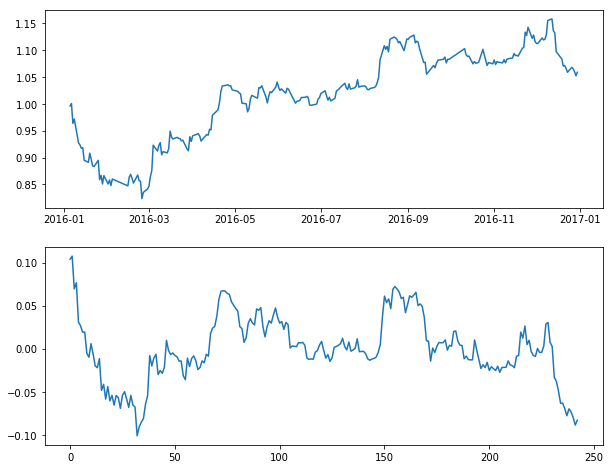

In [38]:
from scipy import signal
r_add1 = returns+1
cumulative_r = r_add1.cumprod()   # 快速获得累积收益
detrend_returns=signal.detrend(cumulative_r)
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(cumulative_r)
plt.subplot(212)
plt.plot(detrend_returns)
plt.show()

## 4. Scipy.stats.probplot

probplot可以用来帮助我们确定样本数据的分布特性。

prob-plot和横坐标表示目标分布的分位数，纵坐标表示样本分布对应的分位数。

目标分布以参数的方式传入（dist），默认是norm正态分布。

如果看到一条45度角的直线，则说明样本分布和目标分布一致。

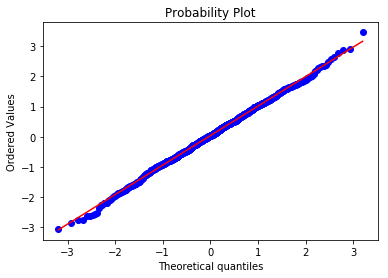

In [39]:
import pylab 
stats.probplot(generated, dist="norm",plot=pylab)
pylab.show()

## 5. 不同probplot图表反映的特性

使用probplot可以直观的比较样本分布和正态分布的差异，判断样本分布峰度，偏度等特性。

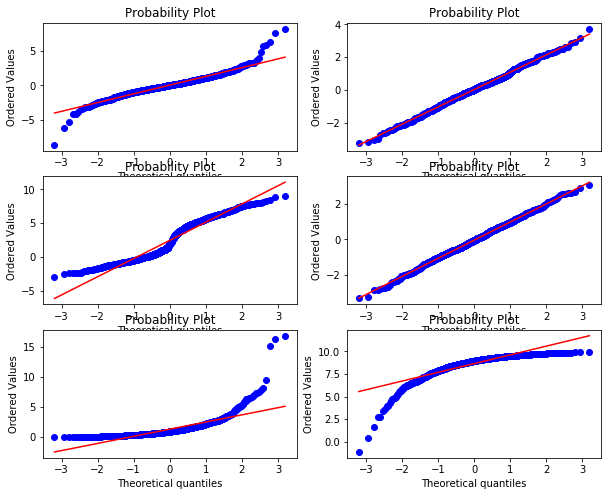

In [40]:
import matplotlib.pyplot as plt
nsample = 1000
plt.figure(figsize=(10,8))

ax1 = plt.subplot(321)
x1 = stats.t.rvs(5, size=nsample)   # 自由度低的t-分布, 厚尾
res = stats.probplot(x1, plot=plt)

ax2 = plt.subplot(322)              # 自由度高的t-分布， 和正态分布很相近
x2 = stats.t.rvs(30, size=nsample)
res = stats.probplot(x2, plot=plt)

ax3 = plt.subplot(323)
x3 = stats.norm.rvs(loc=[0,5], scale=[1,1.5],size=(nsample//2,2)).ravel()
# 两个正态分布的混合
res = stats.probplot(x3, plot=plt)

ax4 = plt.subplot(324)
x4 = stats.norm.rvs(loc=0, scale=1, size=nsample)  # 标准正态分布
res = stats.probplot(x4, plot=plt)

ax5 = plt.subplot(325)
x5 = stats.f.rvs(4,10,loc=0, scale=1, size=nsample) # skewness < 0
res = stats.probplot(x5, plot=plt)

ax6 = plt.subplot(326)
x6 = -stats.lognorm.rvs(s=0.7, loc=-10, scale=1, size=nsample) # skewness > 0
res = stats.probplot(x6, plot=plt)

## 6. BoxPlot

同probplot一样，boxplot也可以用来区分样本分布的斜率峰度等属性。

In [41]:
import pandas as pd
boxData = pd.DataFrame({'1_t_5':x1,'2_t_30':x2,'3_mixNorm':x3,
                        '4_normal':x4,'5_leftS':x5,'6_rightS':x6})
boxData.head()

,1_t_5,2_t_30,3_mixNorm,4_normal,5_leftS,6_rightS
0,-1.102508,0.926098,-0.779768,-0.513247,0.736947,9.785976
1,0.369242,-0.507947,2.666612,-0.168133,0.306141,8.139078
2,0.694389,1.858989,0.910097,0.578881,1.591072,8.971035
3,0.103258,0.872769,2.866707,1.253626,0.650263,8.774698
4,0.054254,0.344499,-1.209175,1.602847,1.674964,8.979324


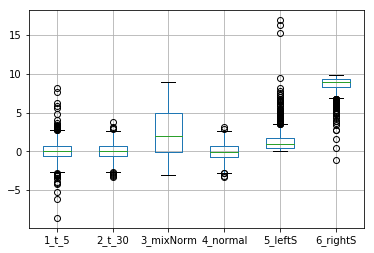

In [42]:
boxData.boxplot()